In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from DAFD.metrics_study.metric_utils import *
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from tqdm import tqdm
from DAFD.helper_scripts.ModelHelper import ModelHelper
from sklearn.feature_selection import f_regression

Using TensorFlow backend.


regime classifier
Loading classifier
Train accuracy: 0.9887387387387387

Regression model generation_rate2
Loading Regressor
R square (R^2) for Train:                 0.987384

Regression model droplet_size2
Loading Regressor
R square (R^2) for Train:                 0.983142

Regression model generation_rate1
Loading Regressor
R square (R^2) for Train:                 0.965872

Regression model droplet_size1
Loading Regressor
R square (R^2) for Train:                 0.953238

regime classifier
Loading classifier
Train accuracy: 0.9887387387387387

Regression model generation_rate2
Loading Regressor
R square (R^2) for Train:                 0.987384

Regression model droplet_size2
Loading Regressor
R square (R^2) for Train:                 0.983142

Regression model generation_rate1
Loading Regressor
R square (R^2) for Train:                 0.965872

Regression model droplet_size1
Loading Regressor
R square (R^2) for Train:                 0.953238



In [11]:
# Load datasets to be used for analysis
chips = pd.read_csv("data/20220520_versatility_study/20220520_versatility_results_dripping.csv")
all_results = pd.read_csv("data/20220520_allData.csv")

# Filter results manually
all_results = all_results.loc[all_results["regime"] == 1, :]
#all_results = all_results.loc[all_results["diff"] < 50, :]
#chips = chips.loc[chips["score"] != -1,:]
chips = chips.sort_values("score")

In [12]:
all_results.rename(columns={"chip_number":"chip_num"}, inplace=True)


c:\users\dpmci\miniconda3\envs\dafd\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\dpmci\miniconda3\envs\dafd\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


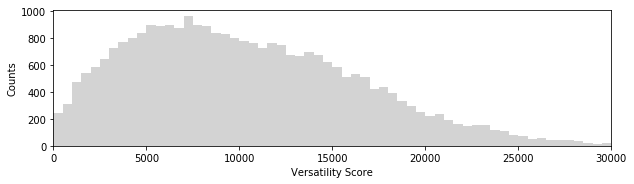

In [13]:
import matplotlib
bin_range = [0,30000]
plt.figure(figsize=[10,2.5])
plt.hist(chips.score, bins=60, range=bin_range, color="#d3d3d3")
plt.xlim([0,30000])
plt.xlabel("Versatility Score")
plt.ylabel("Counts")

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#plt.savefig("20220609_versatility_distribution.pdf")


In [48]:
unique_chips = all_results.loc[:, "chip_num"].unique()
arr_means = []
for chip in unique_chips:
    data = all_results.loc[all_results["chip_num"] == chip, :]
    arr_means.append([chip, data.droplet_size.median(), data.generation_rate.median()])
df_means = pd.DataFrame(arr_means, columns=["chip_num", "mean_size", "mean_rate"])

In [49]:
df_means.loc[df_means.chip_num==17627,:]

,chip_num,mean_size,mean_rate
17624,17627,64.70307,85.281437


In [43]:
max_val = 110
min_val = 90

in_range = df_means.loc[df_means.mean_size <max_val, :].loc[df_means.mean_size>min_val,:]
in_range = in_range.loc[in_range.mean_rate <max_val, :].loc[in_range.mean_rate>min_val,:]
ch_in_range = chips.loc[in_range.chip_num, :].sort_values("score").dropna()
ch_in_range

,Unnamed: 0,aspect_ratio,chip_number,expansion_ratio,flow_rate_ratio,normalized_oil_inlet,normalized_orifice_length,normalized_water_inlet,orifice_size,rate_score,score,size_score
6820,6820,1.5,6820,2.0,2.0,4.0,1.0,3.0,100,36.441658,1318.710371,53.519394
3695,3695,2.5,3695,3.0,2.0,4.0,1.0,3.0,75,59.499664,1643.789122,52.751495
2315,2315,2.0,2315,2.0,2.0,3.5,1.0,3.0,75,51.332382,1711.180569,48.982765
7915,7915,2.0,7915,2.0,2.0,3.5,1.0,2.5,100,65.020046,2066.491603,51.345436
16946,16946,1.0,16946,2.0,2.0,4.0,1.5,3.0,150,102.983791,3655.333985,58.401054
12120,12120,1.0,12120,5.0,2.0,4.0,1.0,4.0,125,110.765343,3738.053570,76.901794
8295,8295,2.0,8295,3.5,2.0,4.0,1.0,2.5,100,111.107342,3790.399455,59.905106
16945,16945,1.0,16945,2.0,2.0,4.0,1.0,3.0,150,121.293777,3817.714377,48.870224
2970,2970,2.0,2970,4.5,2.0,4.0,1.0,3.5,75,75.251602,3862.374574,82.148029
10022,10022,2.5,10022,6.0,2.0,4.0,2.0,2.0,100,125.177574,3956.273783,92.817726


In [12]:
ch_in_range.to_csv("20220315_versatile_chips.csv")

In [25]:
all_results.loc[all_results.chip_num == 13743, :]

,Unnamed: 0,index,Unnamed: 0.1,Unnamed: 0.1.1,aspect_ratio,capillary_number,expansion_ratio,flow_rate_ratio,normalized_oil_inlet,normalized_orifice_length,normalized_water_inlet,orifice_size,droplet_size,generation_rate,chip_num,regime,inferred_diameter,oil_flow_rate,water_flow_rate,diff
2198993,2198993,2198993,1374301,1,2.0,0.161111,2.5,2.0,3.5,2.5,4.0,125,147.815384,40.836704,13743,1,219.015642,1.617361,13.478004,48.168368


In [77]:
test = all_results.loc[all_results.chip_num == 13743, :]
test = test.loc[test.regime == 1, :]
test.mean()

Unnamed: 0                   2.198936e+06
index                        2.198936e+06
Unnamed: 0.1                 9.995247e+05
Unnamed: 0.1.1               3.381818e+01
aspect_ratio                 2.000000e+00
capillary_number             9.987374e-02
expansion_ratio              2.500000e+00
flow_rate_ratio              1.179798e+01
normalized_oil_inlet         3.500000e+00
normalized_orifice_length    2.500000e+00
normalized_water_inlet       4.000000e+00
orifice_size                 1.250000e+02
droplet_size                 9.453777e+01
generation_rate              1.455740e+01
chip_num                     1.374300e+04
regime                       1.000000e+00
inferred_diameter            2.409132e+02
oil_flow_rate                1.002611e+00
water_flow_rate              2.423477e+00
diff                         1.698218e+02
dtype: float64

In [7]:
nos = in_range.chip_num
dripping = all_results.loc[all_results.regime == 1, :]

# #restus = all_results.loc[all_results.chip_num == 13743, :]
# results = test.loc[test.regime == 1, :]

results = [all_results.loc[all_results["chip_num"]==x].loc[all_results.regime==1] for x in nos]

1732

In [8]:
for i, x in enumerate(results):
    sizes = x["droplet_size"].tolist()
    rates = x["generation_rate"].tolist()
    chnum = x.chip_num.unique()[0]
    score = -1
    #np.array(nos)[0]
    #
    print(f"No:{chnum}, score: {score}") 
    print(f"Size Range: {max(sizes) - min(sizes)}, Rate Range: {max(rates) - min(rates)}")
    print(f"Mean Size: {np.mean(sizes)} Mean Rate: {np.mean(rates)}")
    print(f"pct size change: {(max(sizes)/min(sizes))}, pct rate change: {(max(rates)/min(rates))}")
    print("\n")

No:3719, score: -1
Size Range: 121.93838119506836, Rate Range: 349.7252502441406
Mean Size: 100.78856281800704 Mean Rate: 100.1297948143699
pct size change: 3.3260030080107623, pct rate change: 18.109894949953418


No:4329, score: -1
Size Range: 86.59649658203125, Rate Range: 278.1875991821289
Mean Size: 100.10970572965691 Mean Rate: 99.08642954998706
pct size change: 2.2883806669844944, pct rate change: 6.765047461797431


No:7835, score: -1
Size Range: 93.27547073364258, Rate Range: 148.94261932373047
Mean Size: 100.15729857779839 Mean Rate: 99.51371089832203
pct size change: 2.518780868592462, pct rate change: 4.356346637714573


No:22531, score: -1
Size Range: 95.80470657348633, Rate Range: 134.60084533691403
Mean Size: 99.57220802778079 Mean Rate: 99.22282315477912
pct size change: 2.562649675771069, pct rate change: 3.664447904600379




In [6]:
# Get Most and Least versatile devices and compare plots
diff= 25
highest_results = all_results.loc[all_results["chip_num"]==754, :]#.loc[all_results["diff"]<diff,:]
lowest_results = all_results.loc[all_results["chip_num"]==15870, :]#.loc[all_results["diff"]<diff,:]

highest_used = all_results.loc[all_results["chip_num"]==629, :]#.loc[all_results["diff"]<diff,:]
low_used = all_results.loc[all_results["chip_num"]==21495, :]#.loc[all_results["diff"]<diff,:]

plt.figure(figsize=(5,7.5))

#res_2 = results[3:] 

for x in [lowest_results, highest_results, low_used, highest_used]:
    sizes = x["droplet_size"].tolist()
    rates = x["generation_rate"].tolist()
    points = np.array([[sizes[i], rates[i]] for i in range(len(sizes))])
    hull = ConvexHull(points)
    plt.scatter(points[:,0], points[:,1], s=10)
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
        
plt.title("Design Space Coverage of Most and Least Versatile Chips")
plt.xlabel("Droplet Size (um)")
plt.ylabel("Generation Rate (Hz)")
#plt.legend(["not versatile", "versatile"])
plt.xlim([0,300])
plt.ylim([0,700])
#plt.savefig("VersatilityExtremes_Compare.pdf")
# ch_in_range.to_csv("99_101_versatility_overlaps.csv")

NameError: name 'all_results' is not defined

(0, 350)

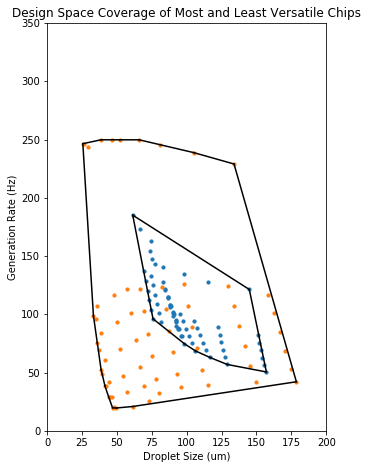

In [18]:
# Get Most and Least versatile devices and compare plots
diff= 25
highest_results = all_results.loc[all_results["chip_num"]==17627, :]#.loc[all_results["diff"]<diff,:]
lowest_results = all_results.loc[all_results["chip_num"]==22531, :]#.loc[all_results["diff"]<diff,:]

# highest_used = all_results.loc[all_results["chip_num"]==629, :]#.loc[all_results["diff"]<diff,:]
# low_used = all_results.loc[all_results["chip_num"]==21495, :]#.loc[all_results["diff"]<diff,:]

plt.figure(figsize=(5,7.5))

#res_2 = results[3:] 

for x in [lowest_results, highest_results]:#, low_used, highest_used]:
    sizes = x.loc[x.capillary_number<.25,:]["droplet_size"].tolist()
    rates = x.loc[x.capillary_number<.25,:]["generation_rate"].tolist()
    points = np.array([[sizes[i], rates[i]] for i in range(len(sizes))])
    hull = ConvexHull(points)
    plt.scatter(points[:,0], points[:,1], s=10)
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
        
plt.title("Design Space Coverage of Most and Least Versatile Chips")
plt.xlabel("Droplet Size (um)")
plt.ylabel("Generation Rate (Hz)")
#plt.legend(["not versatile", "versatile"])
plt.xlim([0,200])
plt.ylim([0,350])
#plt.savefig("VersatilityExtremes_Compare.pdf")
# ch_in_range.to_csv("99_101_versatility_overlaps.csv")

In [39]:
highest_dict = highest_results.to_dict(orient="record")
lowest_dict = lowest_results.to_dict(orient="record")


In [40]:
lowest_denormed = []
highest_denormed = []
for pt in highest_dict:
    highest_denormed.append(denormalize_features(pt))

for pt in lowest_dict:
    lowest_denormed.append(denormalize_features(pt))

In [41]:
highDenorm_df = pd.DataFrame(highest_denormed)
lowDenorm_df = pd.DataFrame(lowest_denormed)


In [45]:
print(np.max(highDenorm_df.water_flow) - np.min(highDenorm_df.water_flow))
print(np.max(lowDenorm_df.water_flow) - np.min(lowDenorm_df.water_flow))


21.05848679275271
26.871506584502146


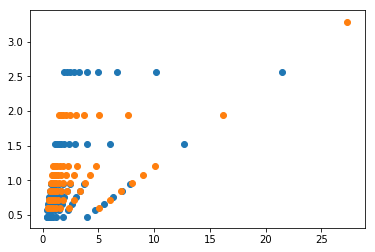

In [42]:
plt.scatter(highDenorm_df.water_flow, highDenorm_df.oil_flow)
plt.scatter(lowDenorm_df.water_flow, lowDenorm_df.oil_flow)

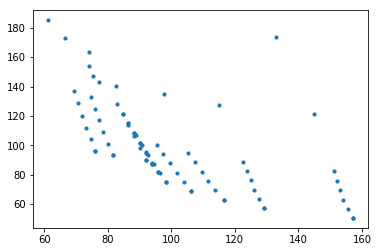

In [18]:
#highest_results.to_csv("20220315_    sizes = x["droplet_size"].tolist()
sizes = lowest_results["droplet_size"].tolist()
rates = lowest_results["generation_rate"].tolist()
points = np.array([[sizes[i], rates[i]] for i in range(len(sizes))])
hull = ConvexHull(points)
plt.scatter(points[:,0], points[:,1], s=10)

In [19]:
simps = []
for simplex in hull.simplices:
    simps.append(simplex[0])
    simps.append(simplex[1])
#        print(f"size:{points[simplex, 0]}, rate:{points[simplex, 1]}", 'k-')
print(len(simps))
print(len(np.unique(simps)))

24
12


In [20]:
lowest_results.iloc[np.unique(simps),:].to_csv("20220316_notVers_hull.csv")

In [41]:
sz = []
for simplex in hull.simplices:
    sz.append(points[simplex[0]][0])
    sz.append(points[simplex[1]][0])

In [42]:
np.unique(sz)

array([ 61.30913925,  71.94506836,  73.25038147,  96.32844543,
       106.27506256, 116.50121307, 129.03692627, 144.88552856,
       157.11384583])

*Main Effect Analysis*

In [6]:
mean_score = chips["score"].mean()
mean_size_score = chips["size_score"].mean()
mean_rate_score = chips["rate_score"].mean()

In [7]:
meff_cols = ['aspect_ratio', 'expansion_ratio',
       'normalized_oil_inlet', 'normalized_orifice_length',
       'normalized_water_inlet', 'orifice_size']#, "capillary_number", "flow_rate_ratio"]

meff_vals = {}
for col in meff_cols:
    sweep_range = all_results[col].unique()
    size_score_avgs = []
    rate_score_avgs = []
    score_avgs = []
    size_score_std = []
    rate_score_std = []
    score_std = []
    
    
    
    for val in sweep_range:
        #size_avgs.append(size_normalized[all_results[col] == val].mean())
        size_score_avgs.append(chips.loc[chips[col] == val, "size_score"].mean())
        rate_score_avgs.append(chips.loc[chips[col] == val, "rate_score"].mean())
        score_avgs.append(chips.loc[chips[col] == val, "score"].mean())
        size_score_std.append(chips.loc[chips[col] == val, "size_score"].std())
        rate_score_std.append(chips.loc[chips[col] == val, "rate_score"].std())
        score_std.append(chips.loc[chips[col] == val, "score"].std())

        
        #meff_vals[col] = {"range": sweep_range, "size_averages": size_avgs, "rate_averages": rate_avgs}
    meff_vals[col] = {"range": sweep_range, "size_score_avgs": size_score_avgs, "rate_score_avgs": rate_score_avgs, "score_avgs": score_avgs,
                      "size_score_std": size_score_std, "rate_score_std":rate_score_std, "score_std":score_std}
    

NameError: name 'meff_vals' is not defined

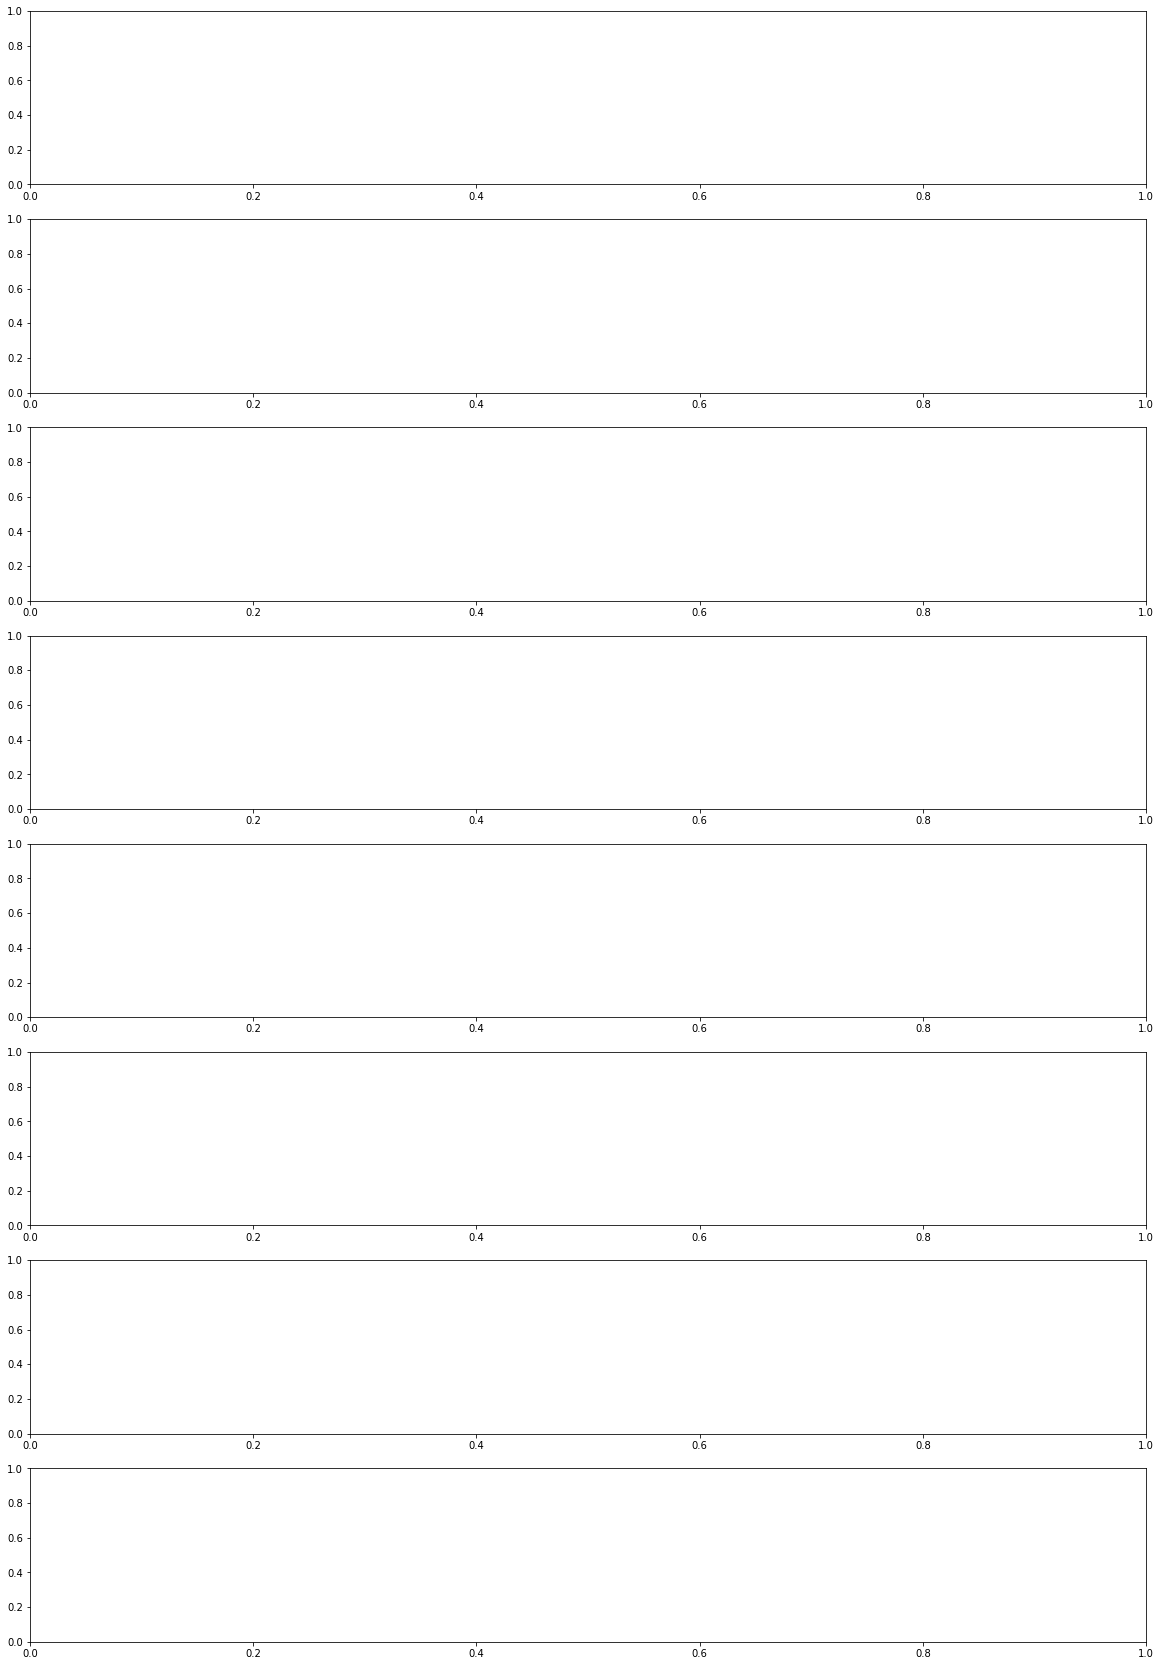

In [3]:
fig, axs = plt.subplots(8,1, figsize=[20,30])

for i, param in enumerate(meff_vals.keys()):
    mean_score = np.mean(meff_vals[param]["score_avgs"])
    
    param_range = meff_vals[param]["range"]
    score_normed =  meff_vals[param]["score_avgs"]#/mean_score
    
    score_std_normed =  meff_vals[param]["score_std"]#/mean_score
    
    
    
    axs[i].plot(param_range, score_normed,"bo")
    axs[i].errorbar(param_range, score_normed, yerr=score_std_normed, fmt="bo", ecolor="k", capsize=5)
    axs[i].plot(param_range, score_normed, "k-.")
    
    axs[i].set_xlabel(param)
    axs[i].set_ylabel("Total Score Change")

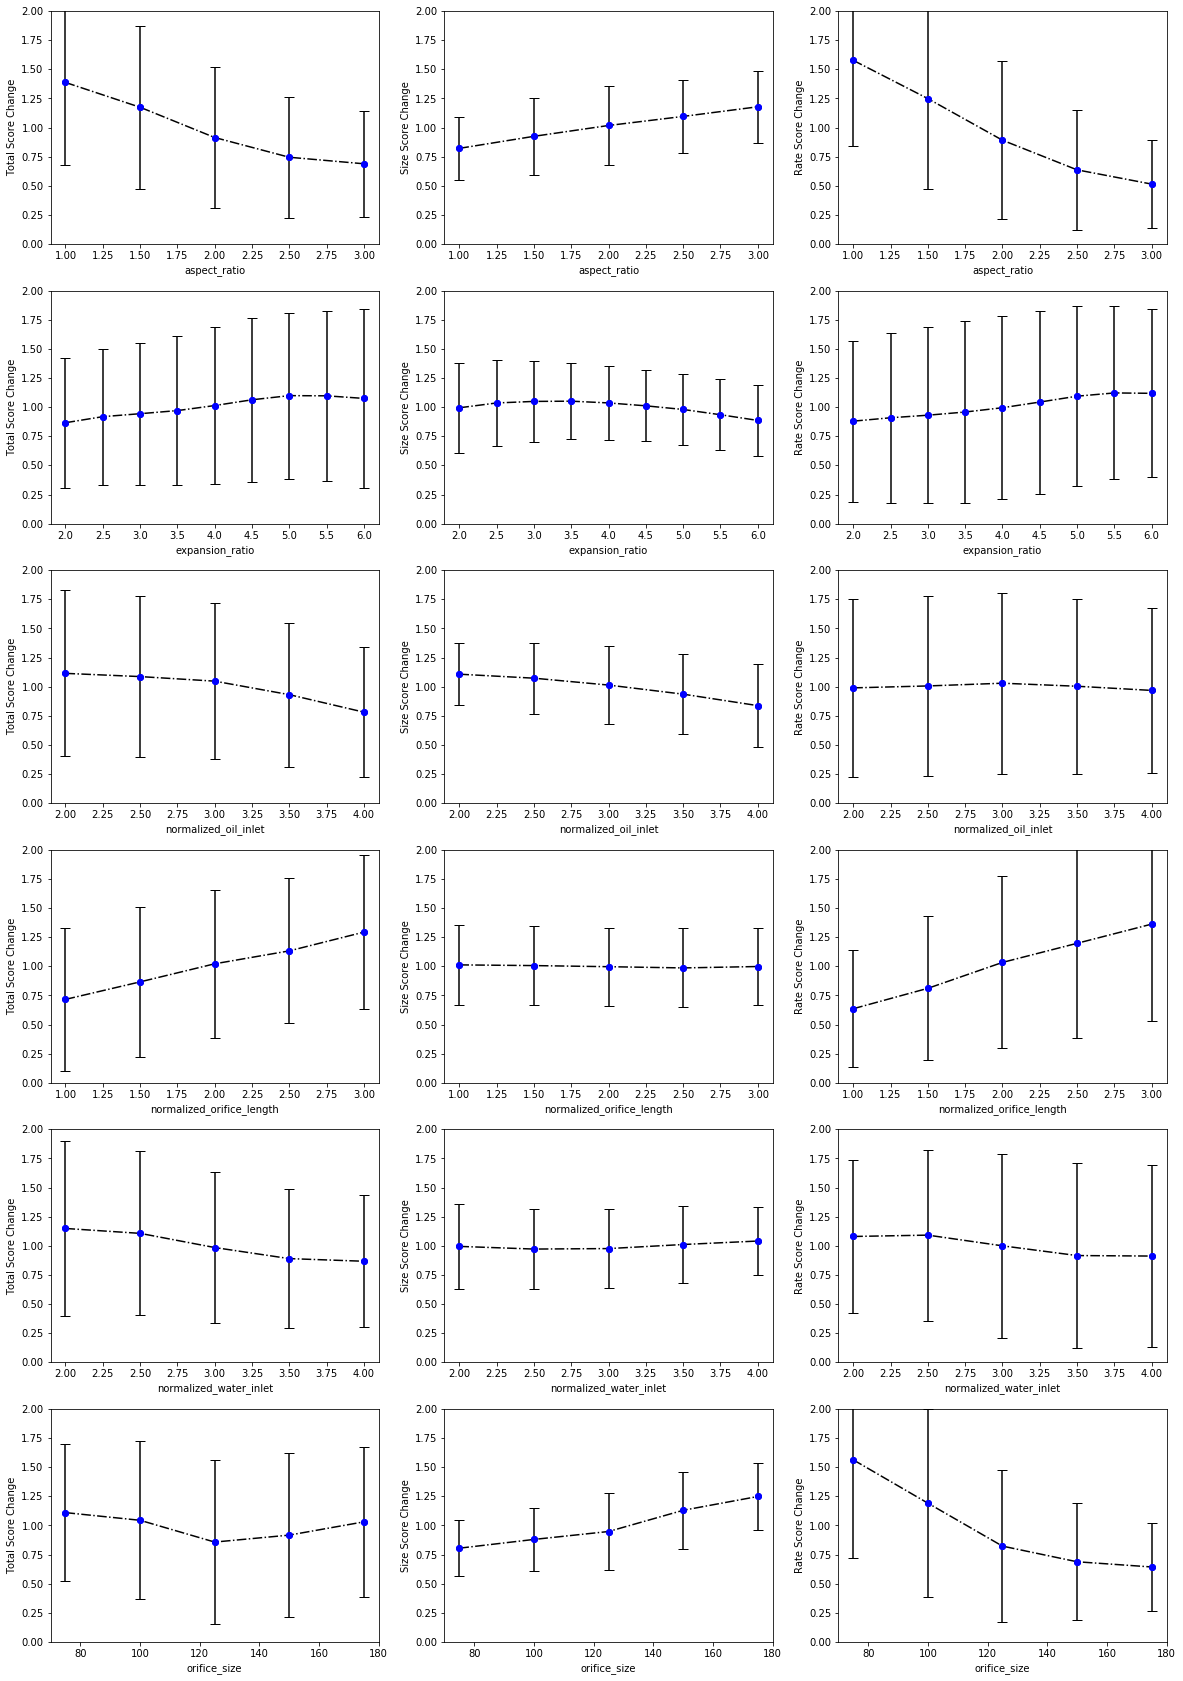

In [11]:
# Plot Main Effect Analysis Results
fig, axs = plt.subplots(6,3, figsize=[20,30])
for i, param in enumerate(meff_vals.keys()):
    param_range = meff_vals[param]["range"]
    score_normed =  meff_vals[param]["score_avgs"]/mean_score
    size_score_normed = meff_vals[param]["size_score_avgs"]/mean_size_score
    rate_score_normed = meff_vals[param]["rate_score_avgs"]/mean_rate_score
    
    score_std_normed =  meff_vals[param]["score_std"]/mean_score
    size_score_std_normed = meff_vals[param]["size_score_std"]/mean_size_score
    rate_score_std_normed = meff_vals[param]["rate_score_std"]/mean_rate_score
    
    axs[i][0].plot(param_range, score_normed, "bo")
    axs[i][0].plot(param_range, score_normed, "k-.")
    axs[i][0].errorbar(param_range, score_normed, yerr=score_std_normed, fmt="bo", ecolor="k", capsize=5)

    axs[i][0].set_xlabel(param)
    axs[i][0].set_ylabel("Total Score Change")
    axs[i][0].set_ylim([0, 2])
        
    axs[i][1].plot(param_range, size_score_normed, "bo")
    axs[i][1].plot(param_range, size_score_normed, "k-.")
    axs[i][1].errorbar(param_range, size_score_normed, yerr=size_score_std_normed, fmt="bo", ecolor="k", capsize=5)

    axs[i][1].set_xlabel(param)
    axs[i][1].set_ylabel("Size Score Change")
    axs[i][1].set_ylim([0, 2])
    
    axs[i][2].plot(param_range, rate_score_normed, "bo")
    axs[i][2].plot(param_range, rate_score_normed, "k-.")
    axs[i][2].errorbar(param_range, rate_score_normed, yerr=rate_score_std_normed, fmt="bo", ecolor="k", capsize=5)

    axs[i][2].set_xlabel(param)
    axs[i][2].set_ylabel("Rate Score Change")
    axs[i][2].set_ylim([0, 2])
    
#plt.savefig('20210420_versatility_dripping.png')

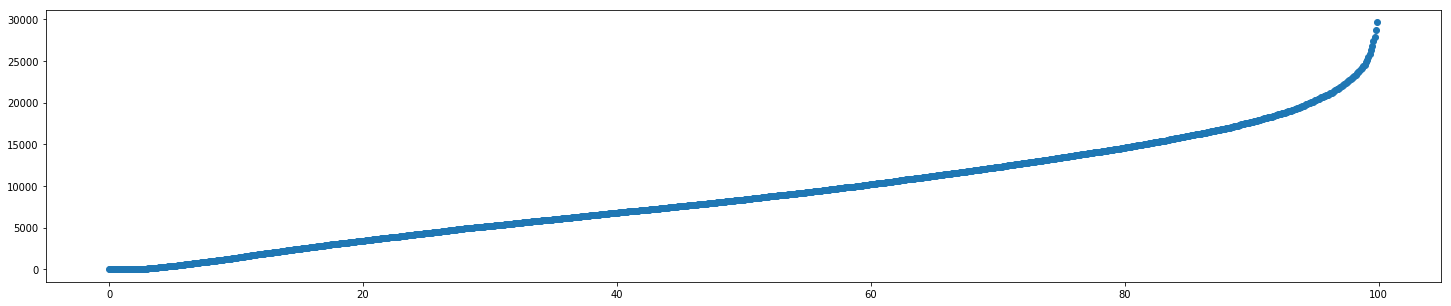

In [15]:
num = 1000
pctiles = []
for i in range(num):
    pctiles.append(chips.score.quantile(i/num))
plt.figure(figsize=[25,5])
plt.scatter(np.arange(num)/10, pctiles)


In [11]:
pd.DataFrame(meff_vals["normalized_water_inlet"])

,range,size_score_avgs,rate_score_avgs,score_avgs,size_score_std,rate_score_std,score_std
0,2.0,124.713546,170.177657,11642.244447,39.601356,103.938031,6830.918135
1,2.5,126.532997,163.627565,11168.090352,38.942903,115.113514,6413.013016
2,3.0,128.219693,152.122854,10122.111609,35.717769,122.123992,5961.541256
3,3.5,127.789132,146.615767,9412.155846,31.464155,122.691624,5378.024496
4,4.0,126.659813,151.023469,9409.875732,28.029150,120.602296,5107.767262


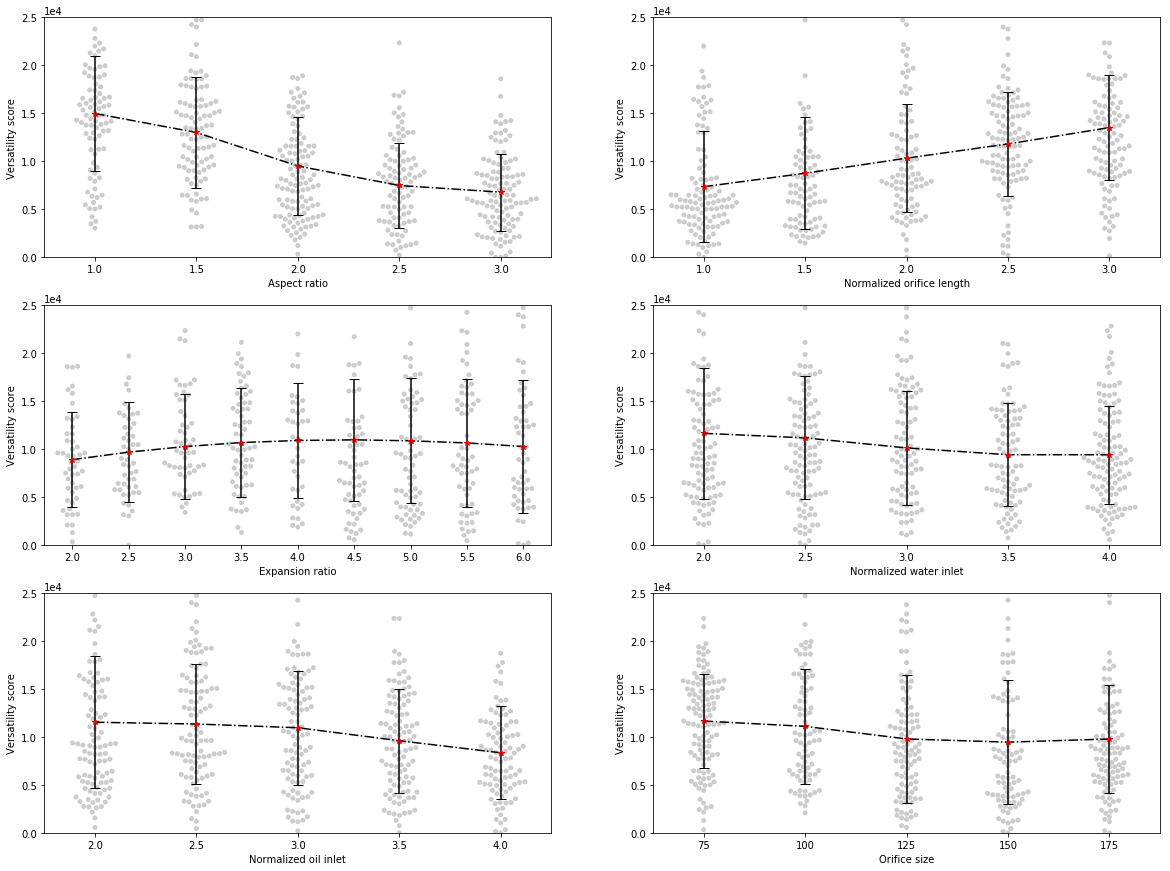

In [12]:
import seaborn as sns
import matplotlib
meff_cols = ['aspect_ratio', 'expansion_ratio',
       'normalized_oil_inlet', 'normalized_orifice_length',
       'normalized_water_inlet', 'orifice_size']#, "capillary_number", "flow_rate_ratio"]
nice_columns = ["Aspect ratio", "Expansion ratio","Normalized oil inlet", "Normalized orifice length",
               "Normalized water inlet", "Orifice size"]
fig, axs = plt.subplots(3,2, figsize=[20,15])


data_to_use = chips.sample(500)

for i, col in enumerate(meff_cols):
    param_range = meff_vals[col]["range"]
    score = meff_vals[col]["score_avgs"]
    err = meff_vals[col]["score_std"]
#     print(i)
#     print(i%4)
#     print(int(i>4))#+ np.floor(i/4))
#     print()
    #sns.set(font_scale=1)
    sns.swarmplot(ax=axs[i%3][int(i>=3)], x=col, y="score", data=data_to_use, color="0", alpha=.2)
    #sns.pointplot(ax=axs[i%3][int(i>=3)],x=col, y='score', data=data_to_use, ci=95)
    #axs[i%3][int(i>=3)].plot(param_range, score, "bo")
    axs[i%3][int(i>=3)].set(ylim=(0, 25000), ylabel="Versatility score", xlabel=nice_columns[i])

    axs[i%3][int(i>=3)].errorbar(range(len(score)), score, yerr=err, fmt="r*", ecolor="k", capsize=5)
    axs[i%3][int(i>=3)].plot(range(len(score)), score, "k-.")
#     font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}

#     matplotlib.rc('font', **font)
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    axs[i%3][int(i>=3)].ticklabel_format(axis="y", style="sci", scilimits=(0,0))

    plt.ylim([0,25000])
    plt.savefig("versatility_mainEffect_dripping.pdf")

In [21]:
score

[10198.120252460132,
 9592.534826759587,
 7874.262065255824,
 8424.018664151532,
 9468.13653977287]

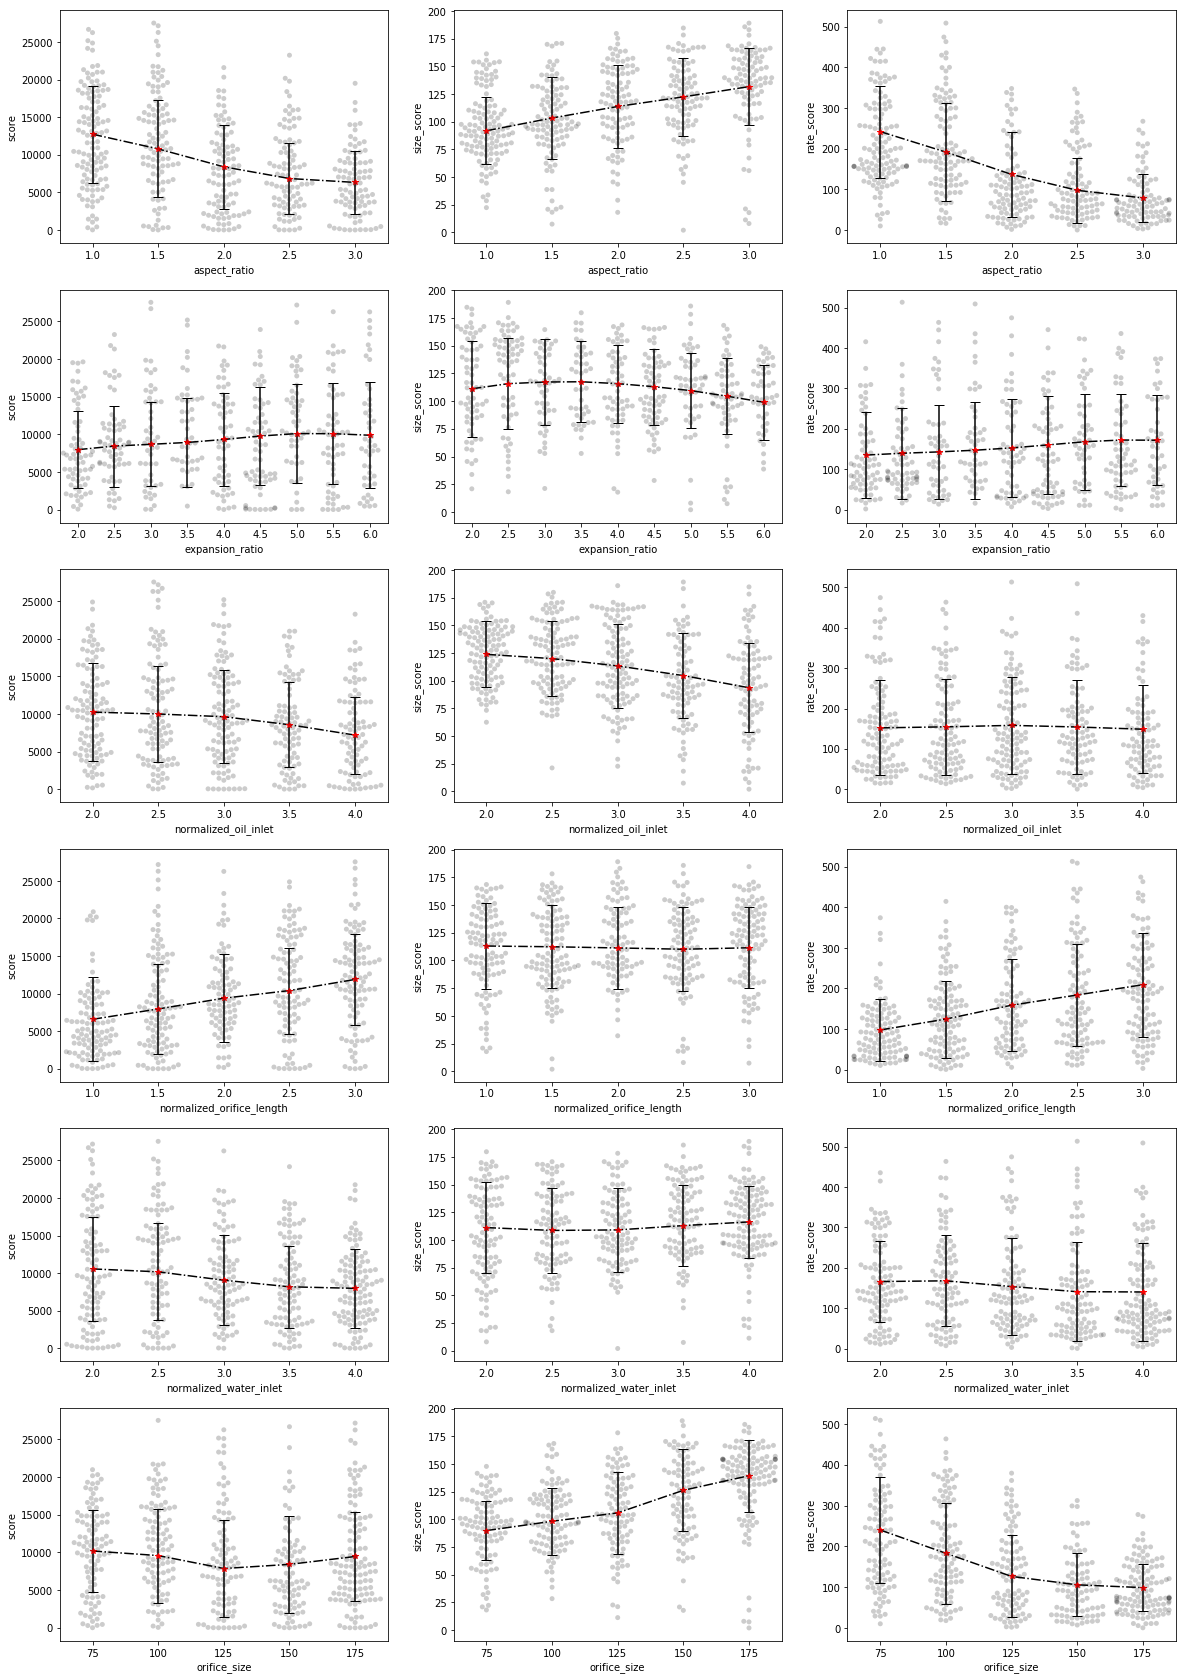

In [48]:
import seaborn as sns
meff_cols = ['aspect_ratio', 'expansion_ratio',
       'normalized_oil_inlet', 'normalized_orifice_length',
       'normalized_water_inlet', 'orifice_size']#, "capillary_number", "flow_rate_ratio"]
fig, axs = plt.subplots(6,3, figsize=[20,30])


data_to_use = chips.sample(500)

for i, col in enumerate(meff_cols):
    for j, score_str in enumerate(["score", "size_score", "rate_score"]):
        param_range = meff_vals[col]["range"]
        score = meff_vals[col][score_str+"_avgs"]
        err = meff_vals[col][score_str+"_std"]

        sns.swarmplot(ax=axs[i][j], x=col, y=score_str, data=data_to_use, color="0", alpha=.2)
        #sns.pointplot(ax=axs[i%3][int(i>=3)],x=col, y='score', data=data_to_use, ci=95)

        #axs[i%3][int(i>=3)].plot(param_range, score, "bo")
        axs[i][j].errorbar(range(len(score)), score, yerr=err, fmt="r*", ecolor="k", capsize=5)
        axs[i][j].plot(range(len(score)), score, "k-.")

plt.savefig("versatility_maineffect.png")

    axs[i%3][int(i>=3)].errorbar(range(len(score)), score, yerr=err, fmt="r*", ecolor="k", capsize=5)
Run F-regression to quantify versatility score sensitivity to parameter changes

In [49]:
X = np.zeros([chips.shape[0], len(meff_cols)])
for i, col in enumerate(meff_cols):
    X[:,i] = chips.loc[:, col]
Y = chips.loc[:, "score"]

In [50]:
f_test_all, _ = f_regression(X,chips.loc[:, "score"])
f_test_size, _ = f_regression(X,chips.loc[:, "size_score"])
f_test_rate, _ = f_regression(X,chips.loc[:, "rate_score"])


In [51]:
F = pd.DataFrame([f_test_all, f_test_size, f_test_rate], columns=meff_cols, index=["score", "size_score", "rate_score"])

In [52]:
F

,aspect_ratio,expansion_ratio,normalized_oil_inlet,normalized_orifice_length,normalized_water_inlet,orifice_size
score,4554.761496,334.129005,750.099024,2573.640749,707.851781,95.715946
size_score,4124.688097,316.093251,2144.022543,10.449639,76.585861,7920.743814
rate_score,9228.105972,325.984393,1.406822,3453.529074,230.916474,6394.456843
